# Check merge

In [1]:
from src.data_preparation import merge_TOPAZ


In [2]:
# sit_ml, chrono_dt = merge_TOPAZ.load(return_na=False, return_bl=False, return_mean=False)
sit_ml, chrono_dt = merge_TOPAZ.load_nc(chr_as_dt=False)

Loading ML-SIT...
	1992-1998
	1999-2010
	2011-2022
Merging...


In [3]:
sit_ml.isel(time=slice(2554,2560)).time

<xarray.DataArray 'time' (time: 6)>
array(['1998-12-29T00:00:00.000000000', '1998-12-30T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '1999-01-02T00:00:00.000000000', '1999-01-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-12-29 1998-12-30 ... 1999-01-03
Attributes:
    long_name:  forecast time

In [8]:
chrono_dt

,date
0,1992-01-01
1,1992-01-02
2,1992-01-03
3,1992-01-04
4,1992-01-05
...,...
11284,2022-11-25
11285,2022-11-26
11286,2022-11-27
11287,2022-11-28


# Check SIA

In [2]:

import os
import numpy as np
import netCDF4 as nc4
import xarray as xr
import pandas as pd

from src.feature_extraction import extract_pca
from src.data_preparation import load_data
from src.visualization import visualize_pca

import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [3]:
# load sia
path = f'{rootdir}Leo/sia/'
file = 'Topaz_arctic25km_sea_ice_age_v2p1_20110101_20221231.nc'

In [4]:
nc = nc4.Dataset(f'{path}{file}', mode='r')
sia = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sia']
chrono = pd.DataFrame({'date':pd.to_datetime(sia['time'].to_numpy())})

In [5]:
sia

<xarray.DataArray 'sia' (time: 4383, y: 479, x: 450)>
[944755650 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2022-12-31
  * y        (y) float64 -3.625e+06 -3.612e+06 -3.6e+06 ... 2.338e+06 2.35e+06
  * x        (x) float64 -2.55e+06 -2.538e+06 -2.525e+06 ... 3.05e+06 3.062e+06
Attributes:
    long_name:  Averaged sea ice age

In [6]:
xr.open_dataset(xr.backends.NetCDF4DataStore(nc))

<xarray.Dataset>
Dimensions:  (time: 4383, y: 479, x: 450, yi: 7)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2022-12-31
  * y        (y) float64 -3.625e+06 -3.612e+06 -3.6e+06 ... 2.338e+06 2.35e+06
  * x        (x) float64 -2.55e+06 -2.538e+06 -2.525e+06 ... 3.05e+06 3.062e+06
  * yi       (yi) int64 7 6 5 4 3 2 1
Data variables:
    sia      (time, y, x) float64 ...
    fyi      (time, y, x, yi) float64 ...
Attributes:
    description:                
    author:                     Leo Edel, Anton Korosov, Nersc
    project:                    TARDIS
    date:                       2023-09-07
    idx_invalid_triangulation:  []

In [7]:
fyi = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['fyi']

In [13]:
ts = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['fyi'][:,:,:,-1]

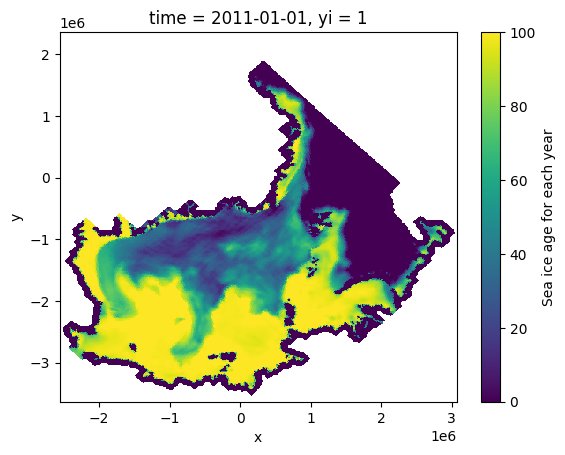

In [14]:
ts.isel(time=0).plot()

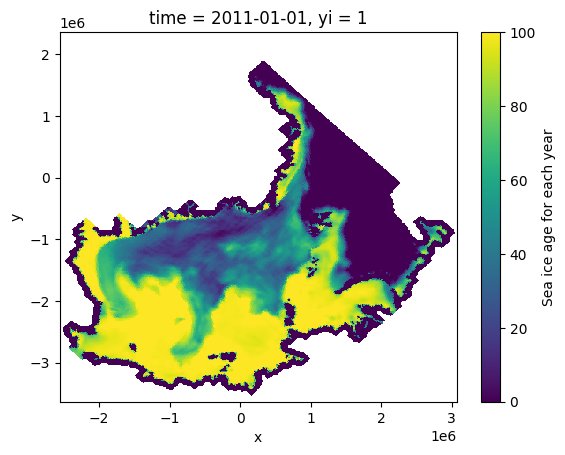

In [8]:
fyi.isel(yi=6, time=0).plot()